## In power transfomer there is two type of transformer
## 1.Box- cox transfprmer  2.Yeo johnson transfromer
## *Box - cox transformer is used to trnasform the data into normal distitbution when the data is position >0*

## *Where as yeo johnson is used in negative data also to tranform into normal distribution*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import scipy.stats as stats

In [2]:
from google.colab import files
uploaded = files.upload()

Saving concrete_data.csv to concrete_data.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['concrete_data.csv']))

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
# split the data for the training ans testing
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test  = train_test_split(X,y,test_size=0.2 , random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_test)

In [11]:
print('the accurcy R2 score', r2_score(y_test, y_pred))

the accurcy R2 score 0.627553179231485


In [12]:
# now lets crosss validate the data ans predict
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
np.mean(cross_val_score(lr ,X,y, scoring='r2'))

0.46099404916628606

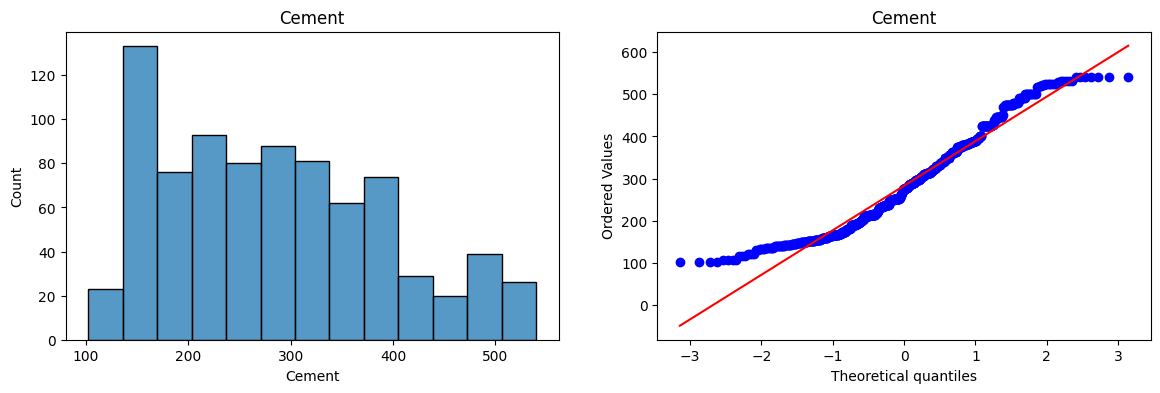

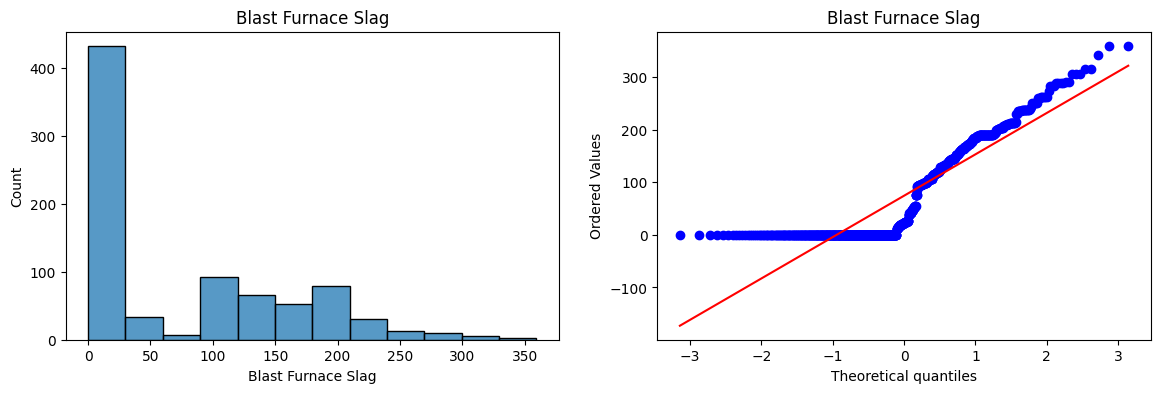

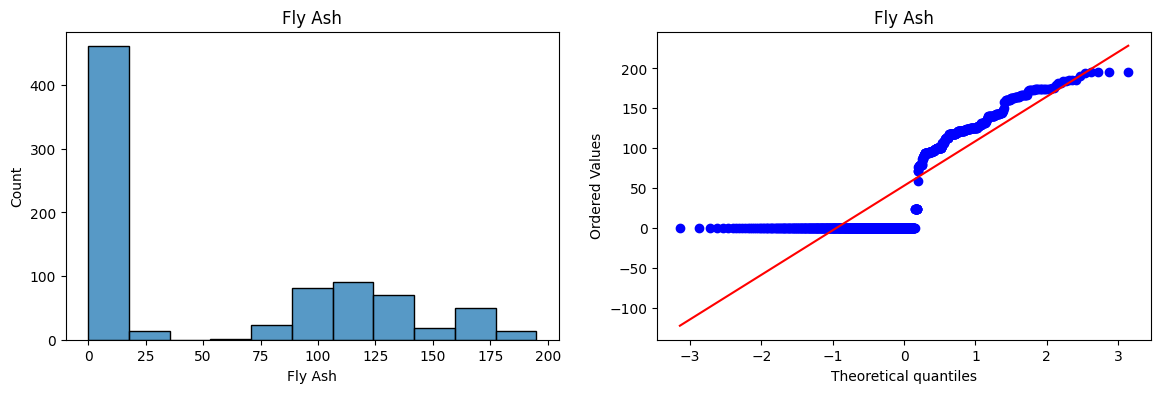

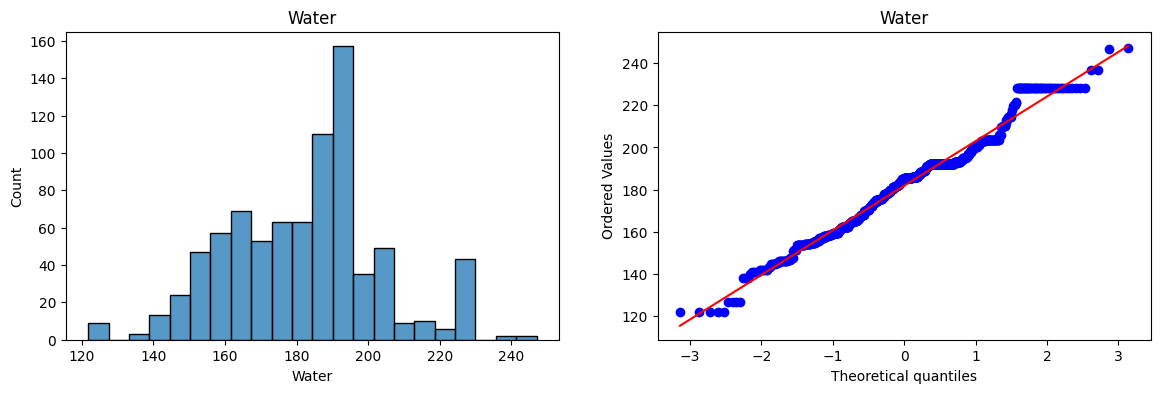

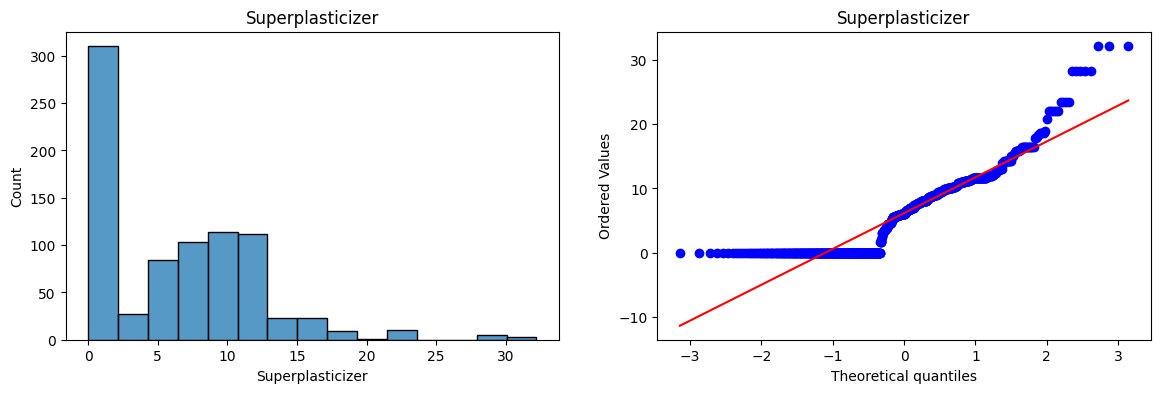

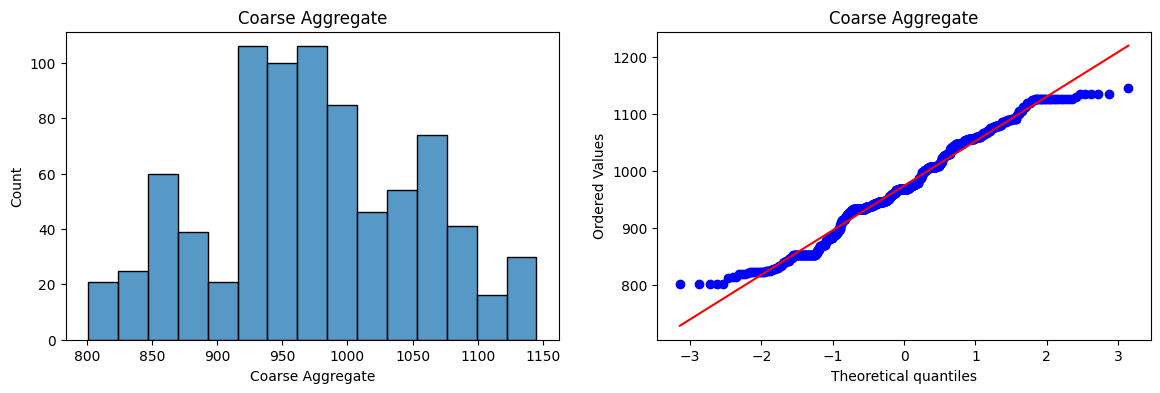

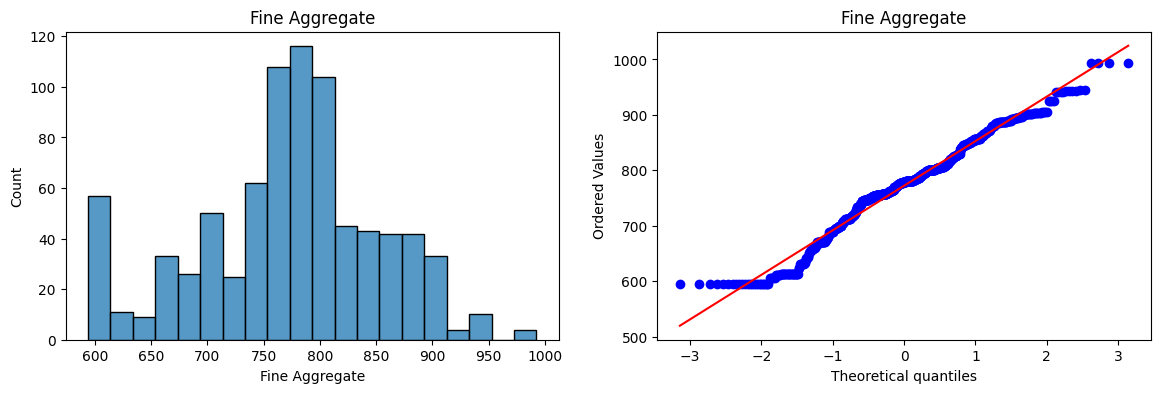

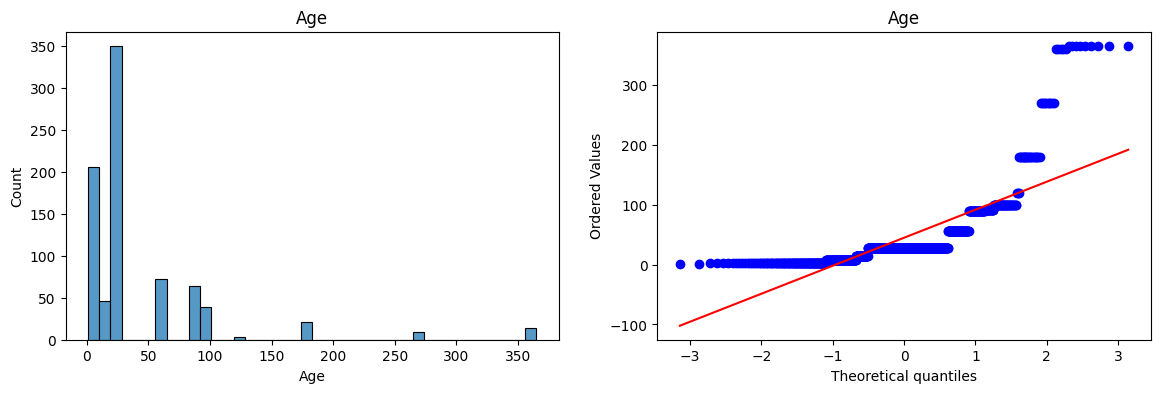

In [13]:
# now the ploating part
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.histplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col] , dist='norm' , plot = plt)
  plt.title(col)
  plt.show()

In [14]:
# Now apply box-cox transformation
trf  = PowerTransformer(method='box-cox')

X_train_trans = trf.fit_transform(X_train+0.0000001)
X_test_trans = trf.fit_transform(X_test+0.0000001)

pd.DataFrame({'cols':X_train.columns , 'box-cox_lamdbas':trf.lambdas_})

,cols,box-cox_lamdbas
0,Cement,0.215602
1,Blast Furnace Slag,0.023556
2,Fly Ash,-0.005774
3,Water,0.959062
4,Superplasticizer,0.091027
5,Coarse Aggregate,1.192491
6,Fine Aggregate,1.973781
7,Age,-0.014692


# now After transformation apply and traint he model again

In [15]:
rgr = LinearRegression()

In [16]:
rgr.fit(X_train_trans ,y_train)

LinearRegression()

In [17]:
y_pred2 = rgr.predict(X_test_trans)

In [18]:
print("after box-cox transformation:",r2_score(y_test,y_pred2))

after box-cox transformation: 0.805055026904373


In [20]:
# now cross val score
rgr1 = LinearRegression()
np.mean(cross_val_score(lr,X_train_trans,y_train,scoring='r2'))

0.7922924823575261

# now comparing after and before transformation

In [21]:
# first convert the transformed data into dataframe so that it will be easy to plot
X_transformed = pd.DataFrame(X_train_trans , columns= X_train.columns)

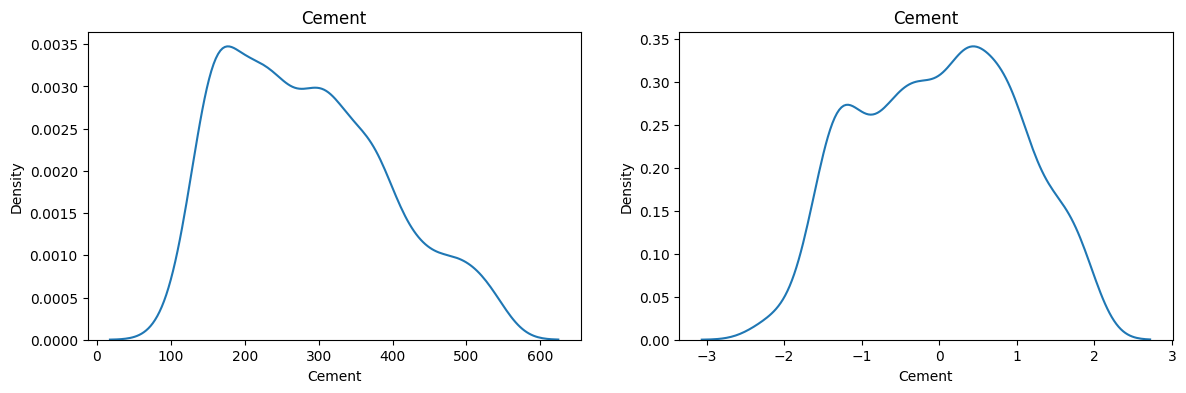

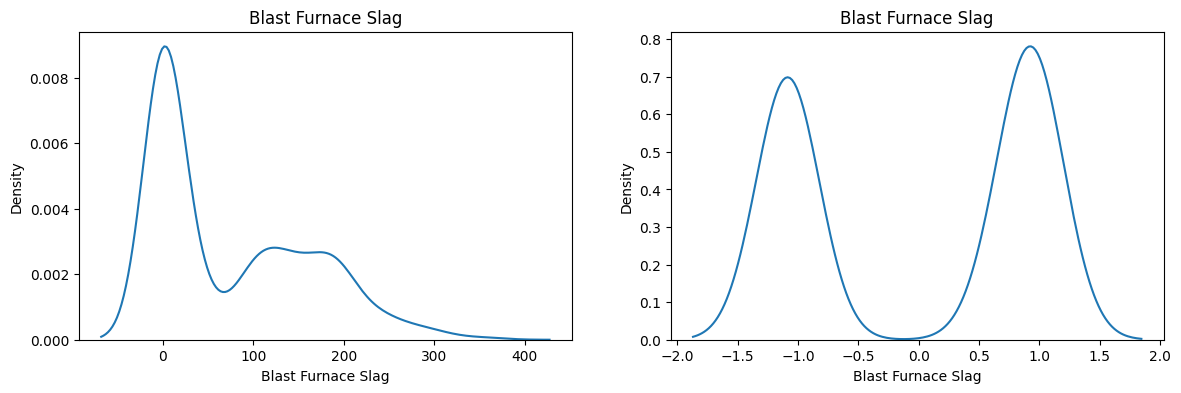

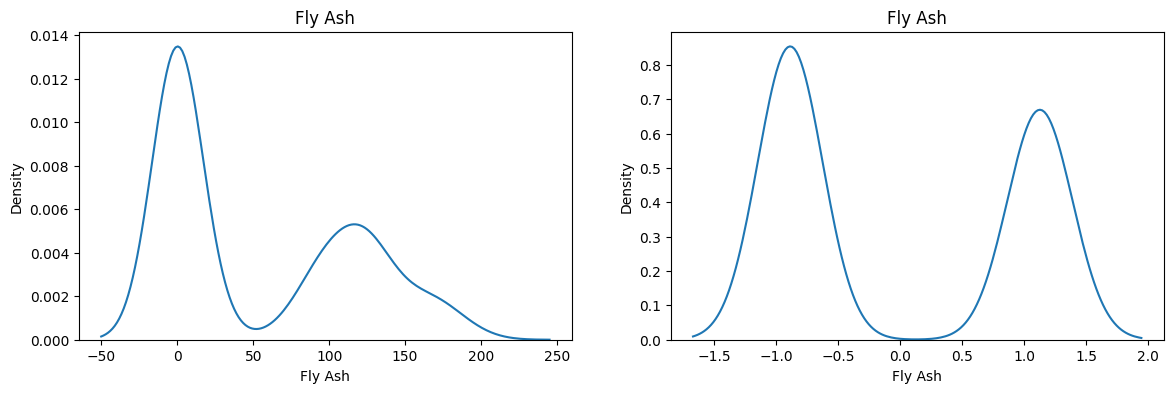

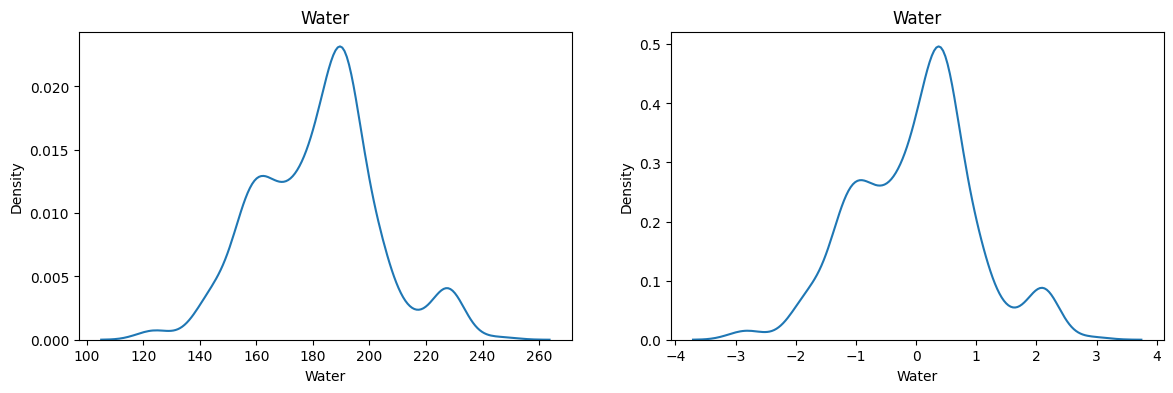

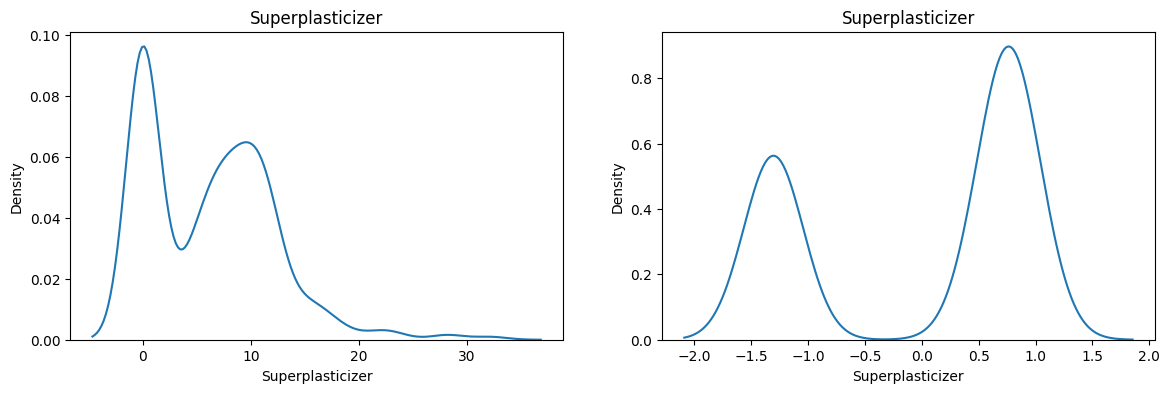

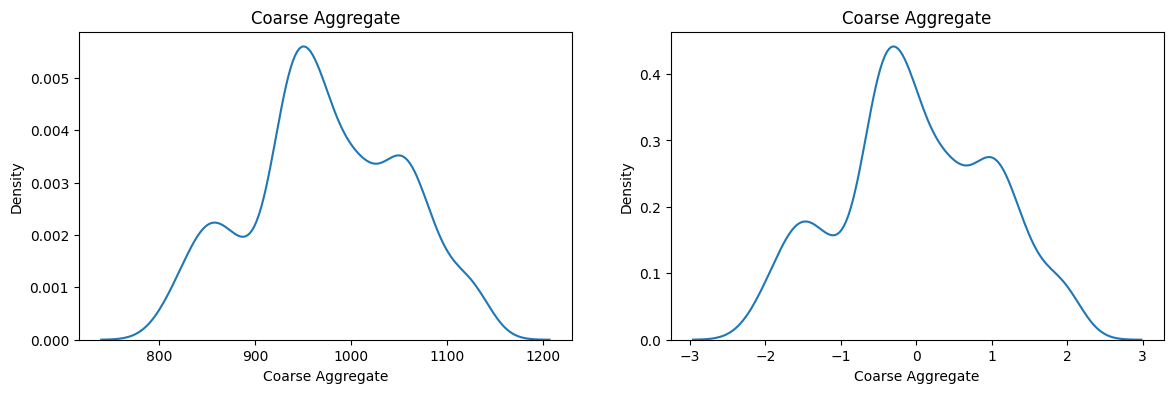

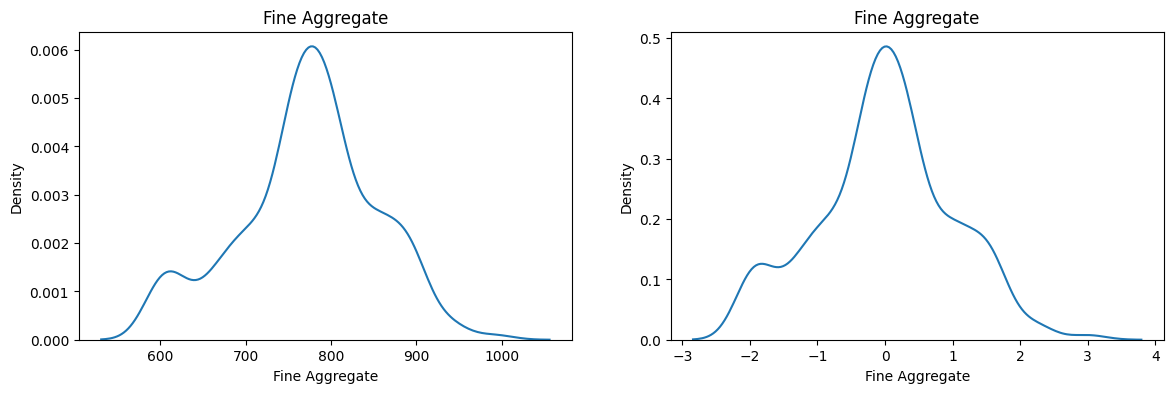

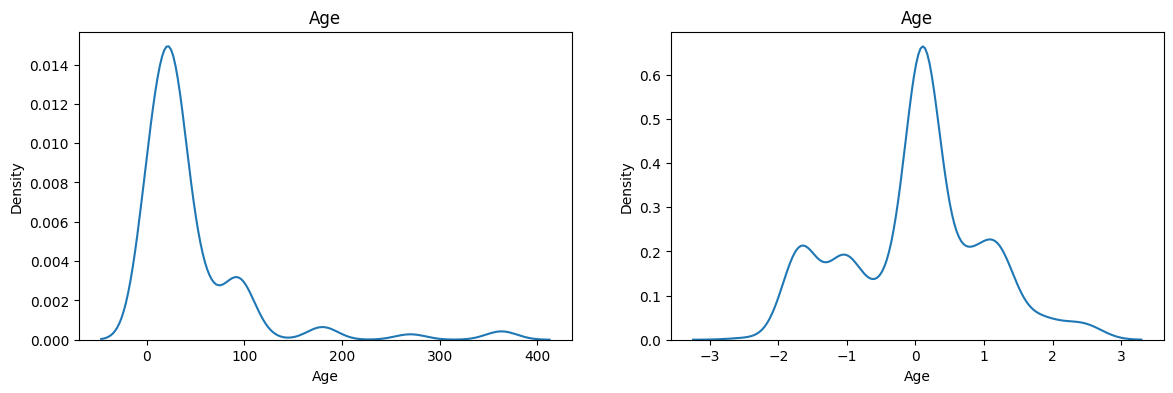

In [27]:
for col in X_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.kdeplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.kdeplot(X_transformed[col] )
  plt.title(col)
  plt.show()

## Now apply yeo johnson transformation which can be also applied for the negative values

In [28]:
pt = PowerTransformer() #by default it will be yeo johnson


In [29]:
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.fit_transform(X_test)

In [30]:
lr1 = LinearRegression()
lr1.fit(X_train_transformed ,y_train)

LinearRegression()

In [31]:
y_pred2 = lr1.predict(X_test_transformed)

In [32]:
print("R2 score after yeo johnson tranfprmation :",r2_score(y_test,y_pred2))

R2 score after yeo johnson tranfprmation : 0.8153845514592458


In [33]:
# now let's apply the cross validation
lr2 = LinearRegression()
np.mean(cross_val_score(lr2,X_train_transformed ,y_train, scoring='r2'))

0.7941782180737023

In [34]:
X_train_transformed2 = pd.DataFrame(X_train_transformed , columns = X_train.columns)

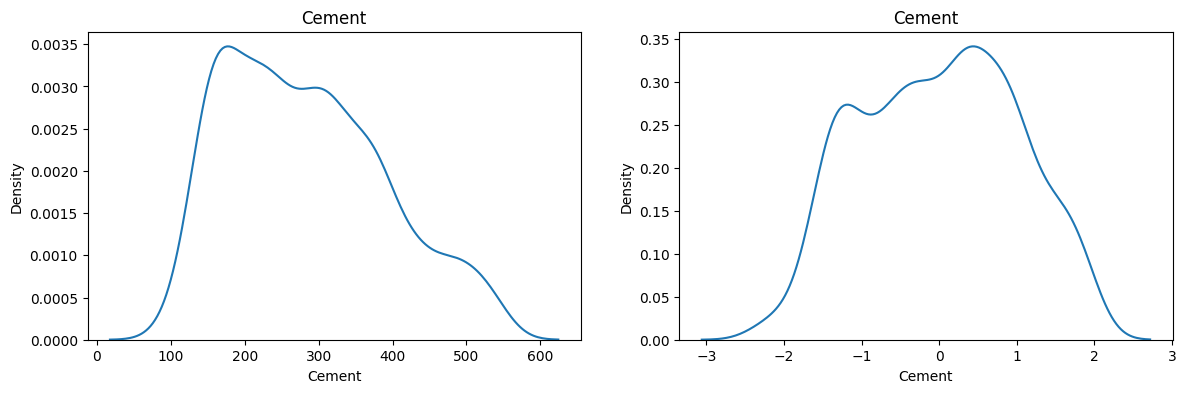

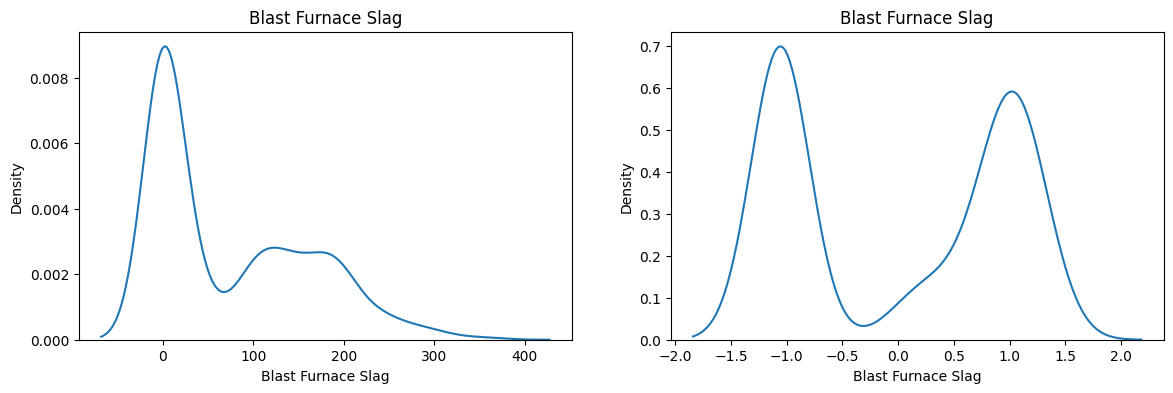

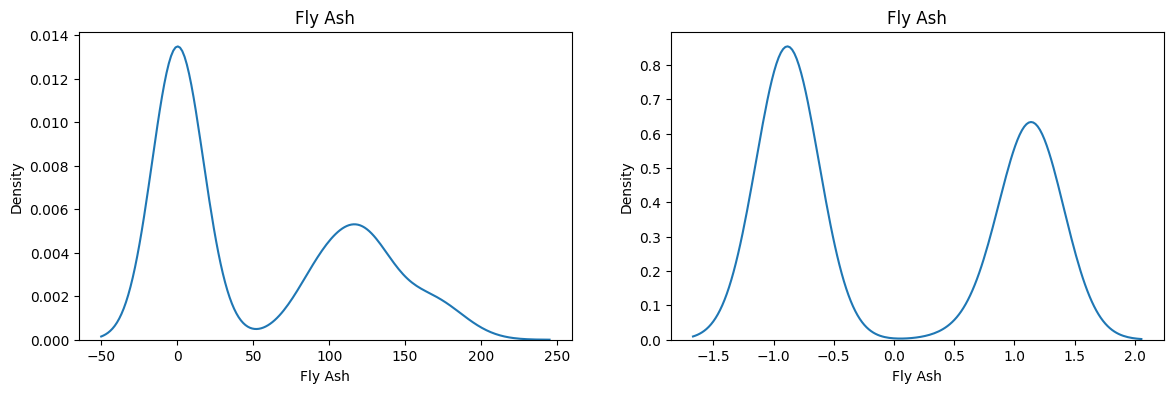

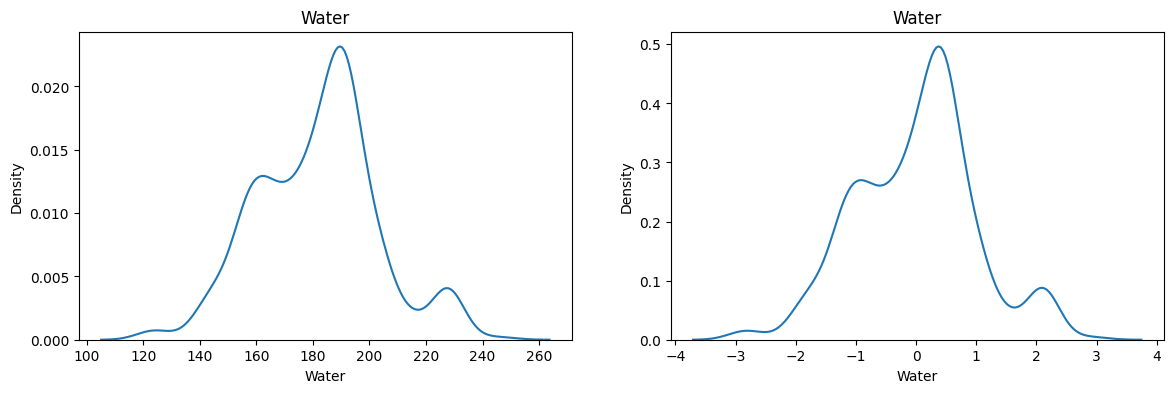

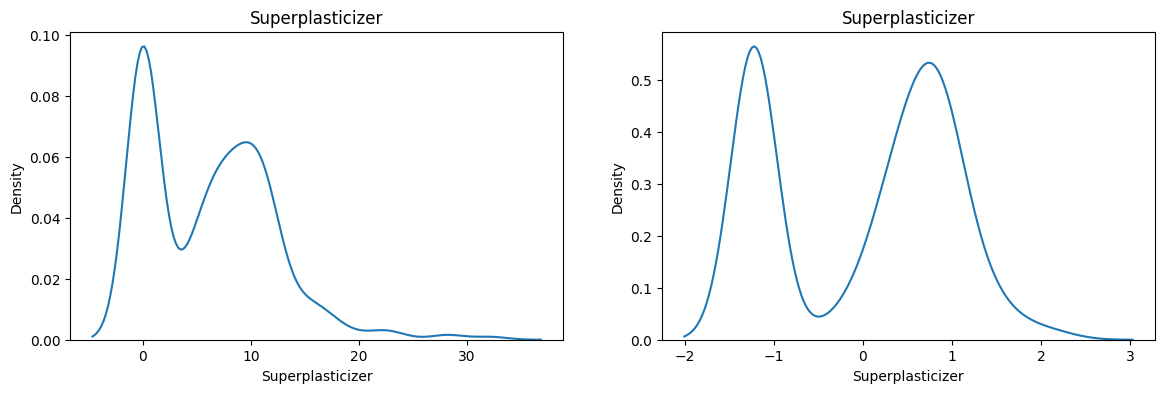

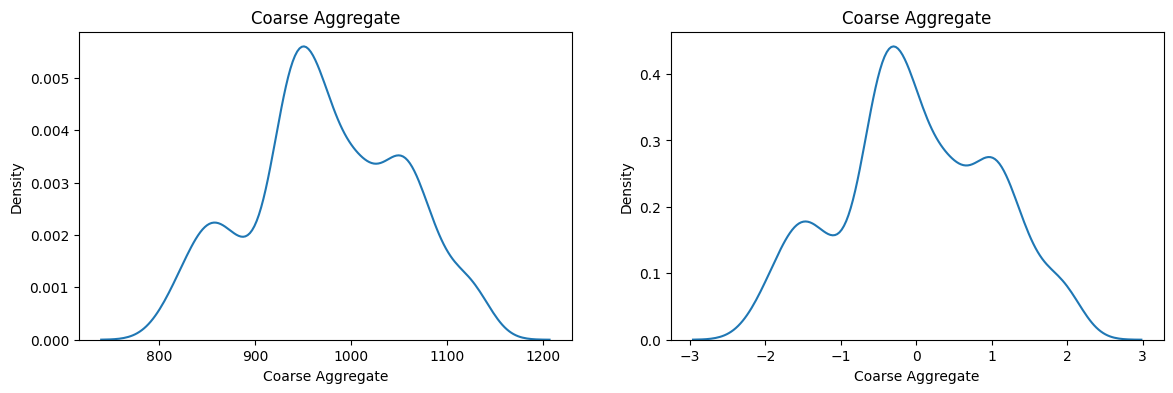

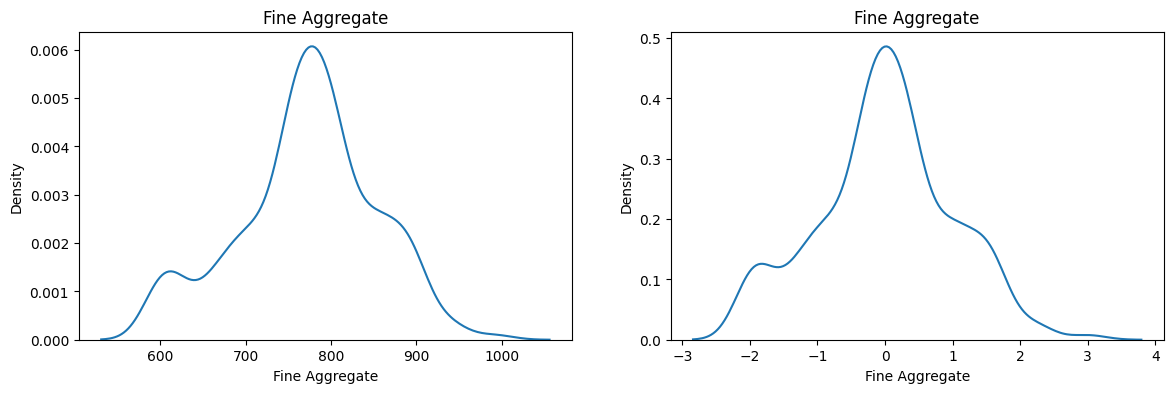

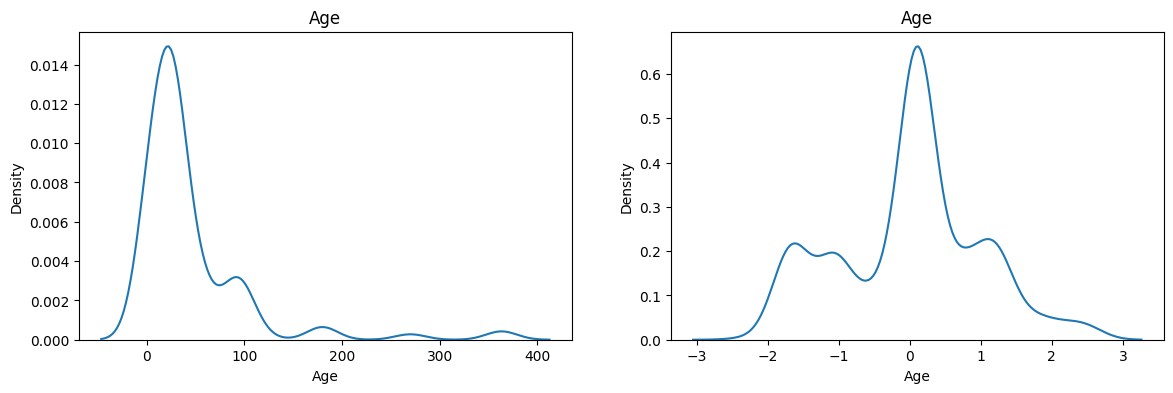

In [35]:
for col in X_train_transformed2.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.kdeplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  sns.kdeplot(X_train_transformed2[col] )
  plt.title(col)
  plt.show()

In [36]:
# now let's see the lambda values of the box-cox and yeo johnson
pd.DataFrame({
    'columns':X_train.columns,
    'Box-cox_lambda':trf.lambdas_,
    'Yeo-Johnson_lambda':pt.lambdas_
})

,columns,Box-cox_lambda,Yeo-Johnson_lambda
0,Cement,0.215602,0.213025
1,Blast Furnace Slag,0.023556,0.020476
2,Fly Ash,-0.005774,-0.038218
3,Water,0.959062,0.958936
4,Superplasticizer,0.091027,0.304951
5,Coarse Aggregate,1.192491,1.192751
6,Fine Aggregate,1.973781,1.975085
7,Age,-0.014692,-0.062443
